# Bayesian Networks Fundamentals

In [1]:
from src.graph_independence import GraphIndependence
from src.graph_independence import DirectedGraphIndependence
from src.probability_distribution import ProbabilityDistribution, find_undirected_imaps, find_directed_imaps
import networkx as nx
import matplotlib.pyplot as plt

## Exercise 1.1

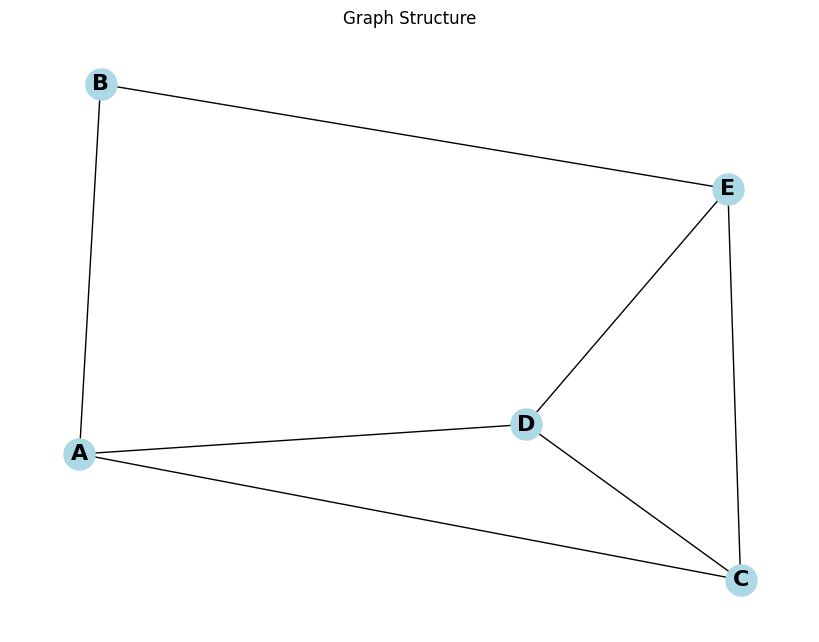

In [2]:
# Create a new graph
G = nx.Graph()

# Add nodes and edges
nodes = ['A', 'B', 'C', 'D', 'E']
edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('C', 'D'), ('B', 'E'), ('C', 'E'),
    ('D', 'E')
]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=16, font_weight='bold')
plt.title("Graph Structure")
plt.show()


In [3]:
# Initialize the graph
gi = GraphIndependence(nodes, edges)

# Define all relationships to check
relationships = [
    ('A', 'B', None),
    ('A', 'D', None),
    ('B', 'C', None),
    ('C', 'D', None),
    ('A', 'E', None),
    ('B', 'C', {'A'}),
    ('B', 'D', {'C'}),
    ('B', 'C', {'A', 'E'}),
    ('B', 'D', {'A', 'E'}),
    ('A', 'E', {'B', 'C'}),
    ('A', 'E', {'B', 'C', 'D'}),
    ('B', 'C', {'A', 'D', 'E'})
]

# Analyze each relationship
for X, Y, observed in relationships:
    print(gi.analyze_relationship(X, Y, observed))
    print("-" * 50)


IG(A, B): False
Paths:
- A -> B: Active
- A -> C -> D -> E -> B: Blocked
- A -> C -> E -> B: Blocked
- A -> D -> C -> E -> B: Blocked
- A -> D -> E -> B: Blocked

--------------------------------------------------
IG(A, D): False
Paths:
- A -> B -> E -> C -> D: Blocked
- A -> B -> E -> D: Blocked
- A -> C -> D: Blocked
- A -> C -> E -> D: Blocked
- A -> D: Active

--------------------------------------------------
IG(B, C): True
Paths:
- B -> A -> C: Blocked
- B -> A -> D -> C: Blocked
- B -> A -> D -> E -> C: Blocked
- B -> E -> C: Blocked
- B -> E -> D -> A -> C: Blocked
- B -> E -> D -> C: Blocked

--------------------------------------------------
IG(C, D): False
Paths:
- C -> A -> B -> E -> D: Blocked
- C -> A -> D: Blocked
- C -> D: Active
- C -> E -> B -> A -> D: Blocked
- C -> E -> D: Blocked

--------------------------------------------------
IG(A, E): True
Paths:
- A -> B -> E: Blocked
- A -> C -> D -> E: Blocked
- A -> C -> E: Blocked
- A -> D -> C -> E: Blocked
- A -> D -> 

## Exercise 1.2

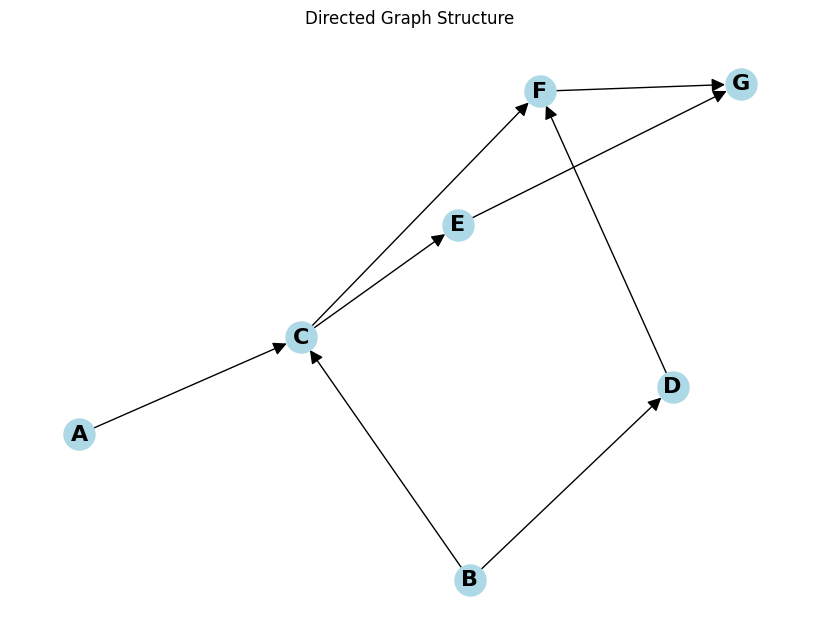

In [4]:
# Define the graph structure
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
edges = [
    ('A', 'C'), ('B', 'C'), ('B', 'D'),
    ('C', 'E'), ('C', 'F'), ('D', 'F'),
    ('E', 'G'), ('F', 'G')
]

# Create and draw the directed graph
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue',
        node_size=500, font_size=16, font_weight='bold',
        arrows=True, arrowsize=20)
plt.title("Directed Graph Structure")
plt.show()

In [5]:
# Initialize the directed graph
dgi = DirectedGraphIndependence(nodes, edges)

# Part 1: Unconditional independence relationships
print("Part 1: Unconditional Independence Relationships")
print("=" * 50)

relationships_part1 = [
    ('A', 'B', None),   # a)
    ('A', 'C', None),   # b)
    ('A', 'D', None),   # c)
    ('A', 'E', None),   # d)
    ('A', 'G', None),   # e)
    ('D', 'E', None),   # f)
    ('C', 'G', None)    # g)
]

for X, Y, observed in relationships_part1:
    print(dgi.analyze_relationship(X, Y, observed))
    print("-" * 50)

# Part 2: Conditional independence relationships
print("\nPart 2: Conditional Independence Relationships")
print("=" * 50)

relationships_part2 = [
    ('A', 'B', {'C'}),           # a)
    ('A', 'B', {'E'}),           # b)
    ('A', 'B', {'F'}),           # c)
    ('A', 'B', {'G'}),           # d)
    ('A', 'D', {'C'}),           # e)
    ('A', 'D', {'E'}),           # f)
    ('A', 'F', {'C'}),           # g)
    ('A', 'F', {'E'}),           # h)
    ('A', 'F', {'G'}),           # i)
    ('A', 'E', {'F'}),           # j)
    ('B', 'E', {'C', 'D'}),      # k)
    ('B', 'G', {'D', 'E'}),      # l)
    ('D', 'E', {'C', 'G'}),      # m)
    ('B', 'F', {'A', 'D', 'G'})  # n)
]

for X, Y, observed in relationships_part2:
    print(dgi.analyze_relationship(X, Y, observed))
    print("-" * 50)

Part 1: Unconditional Independence Relationships
IG(A, B): True
Paths:

--------------------------------------------------
IG(A, C): False
Paths:
- A -> C: Active

--------------------------------------------------
IG(A, D): True
Paths:

--------------------------------------------------
IG(A, E): False
Paths:
- A -> C -> E: Active

--------------------------------------------------
IG(A, G): False
Paths:
- A -> C -> E -> G: Active
- A -> C -> F -> G: Active

--------------------------------------------------
IG(D, E): True
Paths:

--------------------------------------------------
IG(C, G): False
Paths:
- C -> E -> G: Active
- C -> F -> G: Active

--------------------------------------------------

Part 2: Conditional Independence Relationships
IG(A, B|C): True
Paths:

--------------------------------------------------
IG(A, B|E): True
Paths:

--------------------------------------------------
IG(A, B|F): True
Paths:

--------------------------------------------------
IG(A, B|G): True

## Execise 1.3

In [6]:
# Create the probability distribution from the given table
probs = {
    (True, True, True): 0.112,
    (True, True, False): 0.048,
    (True, False, True): 0.064,
    (True, False, False): 0.576,
    (False, True, True): 0.056,
    (False, True, False): 0.024,
    (False, False, True): 0.012,
    (False, False, False): 0.108
}

P = ProbabilityDistribution(probs)

# Part 1: Check independence relationships
print("Part 1: Independence Relationships")
independence_relationships = {
    "IP(A,B)": P.check_independence('A', 'B'),
    "IP(A,C)": P.check_independence('A', 'C'),
    "IP(B,C)": P.check_independence('B', 'C'),
    "IP(B,C|A)": P.check_independence('B', 'C', 'A'),
    "IP(A,C|B)": P.check_independence('A', 'C', 'B'),
    "IP(A,B|C)": P.check_independence('A', 'B', 'C')
}

for rel, is_true in independence_relationships.items():
    print(f"{rel}: {is_true}")

# Part 2: Find undirected I-maps
print("\nPart 2: Undirected I-maps")
undirected_imaps = find_undirected_imaps(independence_relationships)
print(f"Found {len(undirected_imaps)} undirected I-maps:")
for i, edges in enumerate(undirected_imaps, 1):
    print(f"I-map {i}: {edges}")

# Part 3: Find directed I-maps
print("\nPart 3: Directed I-maps")
directed_imaps = find_directed_imaps(independence_relationships)
print(f"Found {len(directed_imaps)} directed I-maps:")
for i, edges in enumerate(directed_imaps, 1):
    print(f"I-map {i}: {edges}")

Part 1: Independence Relationships
IP(A,B): False
IP(A,C): False
IP(B,C): False
IP(B,C|A): False
IP(A,C|B): False
IP(A,B|C): False

Part 2: Undirected I-maps
Found 1 undirected I-maps:
I-map 1: [('A', 'B'), ('A', 'C'), ('B', 'C')]

Part 3: Directed I-maps
Found 2 directed I-maps:
I-map 1: [('A', 'B'), ('B', 'C')]
I-map 2: [('A', 'B'), ('A', 'C'), ('B', 'C')]
